In [106]:
import matplotlib.pyplot as plt
import numpy as np

use_errors = False
fit_type = 1

In [107]:
if fit_type == 1:
    def fitfunction(x,a):

        return mass*np.array(a)/((radius+np.array(x))**2)
else:
    def fitfunction(x,a,b,c):
        return a*np.exp(b*np.array(x)+c*np.power(np.array(x),1.5))

In [108]:
mass = 5.972*10**24 # mass of Earth in kg
radius = 6378.1*10**3 # radius of Earth in m

In [109]:

altitude = []
temp = []
gravity = []
pressure = []
density = []
viscosity = []

In [110]:
npoints = 0
with open('density.txt') as f:
    for line in f:
        npoints=npoints+1
        data = line.split()
        altitude.append(float(data[0]))
        temp.append(float(data[1]))
        gravity.append(float(data[2]))
        pressure.append(float(data[3]))
        density.append(float(data[4]))
        viscosity.append(float(data[5]))
        

In [111]:
if use_errors == True:
    # create a list to hold the uncertainty in the gravity  
    gravity_uncertainty = [0.01,0.01,0.01,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.0001,0.0001,0.0001,0.00001,0.00001,0.000001,0.0000001,0.0000001]
else:
    gravity_uncertainty = [0.0]*len(gravity)
    
gravity_uncertainty = np.array(gravity_uncertainty)

Text(0, 0.5, 'Gravity (m/s^2)')

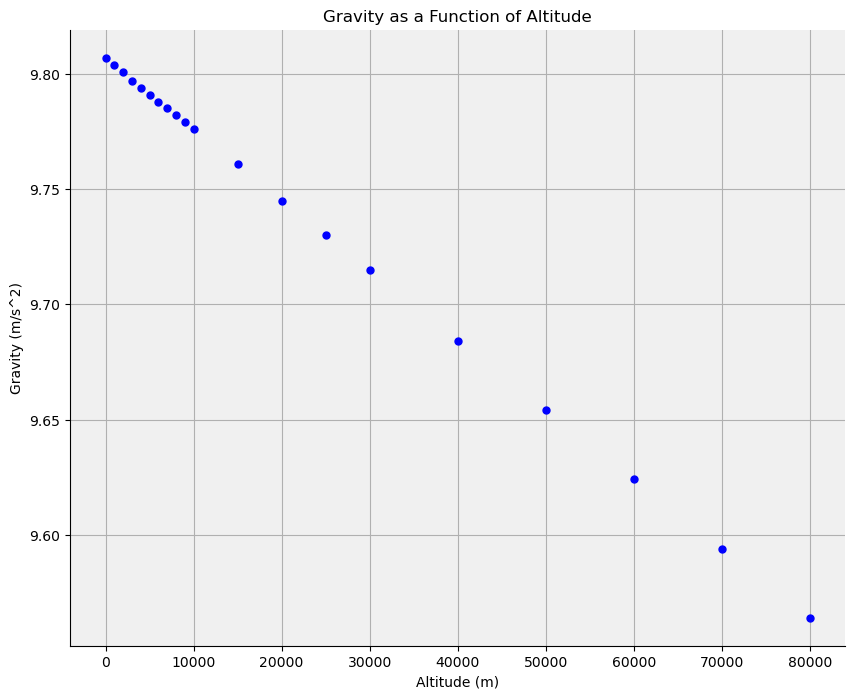

In [112]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Set the grid lines
ax.grid(True)

# Set the background color
ax.set_facecolor('#F0F0F0')

# Set the border properties
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set the line and marker properties
line_color = 'b'
line_width = 0
marker_color = 'b'
marker_style = 'o'
marker_size = 5

# Create the plot
if use_errors == True:
    plt.errorbar(altitude, gravity, yerr=gravity_uncertainty, color=line_color, linewidth=line_width,
         marker=marker_style, markersize=marker_size, markerfacecolor=marker_color)
else:
    plt.plot(altitude, gravity, color=line_color, linewidth=line_width,
         marker=marker_style, markersize=marker_size, markerfacecolor=marker_color)

# Set the plot title and axis labels
plt.title("Gravity as a Function of Altitude")
plt.xlabel("Altitude (m)")
plt.ylabel("Gravity (m/s^2)")
#plt.yscale("log")

In [113]:
from scipy.optimize import curve_fit

if fit_type == 1:
    init_vals = [9.85]
else:
    init_vals = [9.85,-0.0001]

if use_errors == False:
    popt, pcov = curve_fit(fitfunction, altitude, gravity, p0=init_vals)
else:
    popt, pcov = curve_fit(fitfunction, altitude, gravity, sigma=gravity_uncertainty, absolute_sigma=True, p0=init_vals)
    
print (popt)
print (pcov)

[6.67994045e-11]
[[4.94780326e-31]]


In [114]:
yfit = []
chi2=0
for i in range (0,npoints):
    yfit.append(fitfunction(altitude[i],*popt))
    chi2 += (gravity[i]-yfit[i])*(gravity[i]-yfit[i])

print ("Chi^2 / dof = %.3E / %d" % (chi2,npoints-len(init_vals)))
print(yfit)

Chi^2 / dof = 3.997E-06 / 19
[9.806403106457678, 9.803328806173582, 9.800255951349282, 9.79718454107876, 9.794114574456712, 9.791046050578537, 9.787978968540344, 9.784913327438954, 9.781849126371888, 9.778786364437382, 9.77572504073437, 9.760439964203856, 9.745190708705945, 9.729977162397796, 9.714799213872741, 9.684549666713808, 9.654441184621817, 9.624472891838666, 9.594643919391814, 9.564953405031273]


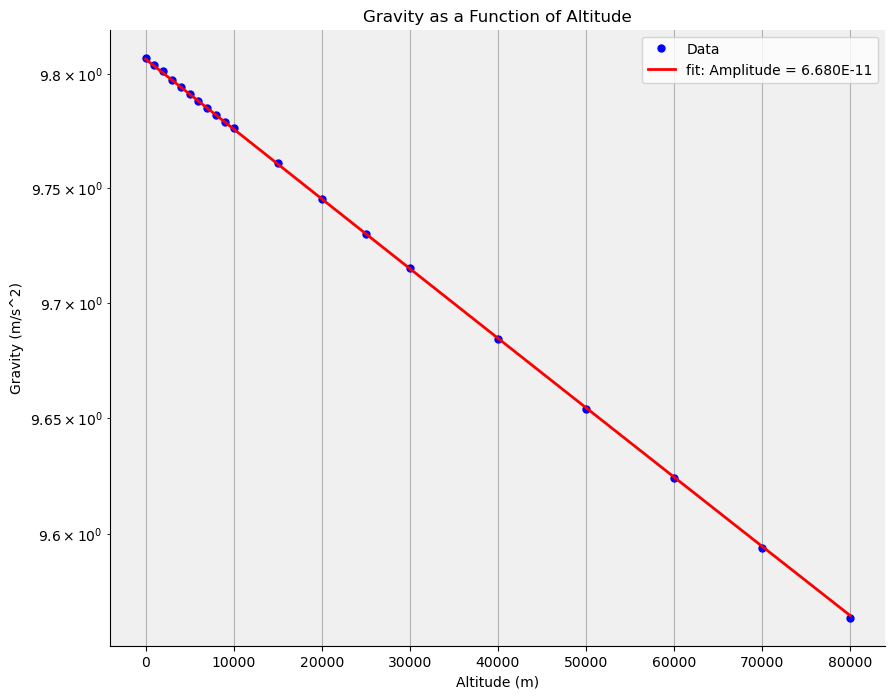

In [115]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Set the grid lines
ax.grid(True)

# Set the background color
ax.set_facecolor('#F0F0F0')

# Set the border properties
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set the line and marker properties
line_color = 'b'
line_width = 0
marker_color = 'b'
marker_style = 'o'
marker_size = 5

# Create the plot
plt.plot(altitude, gravity, color=line_color, linewidth=line_width,
         marker=marker_style, markersize=marker_size, markerfacecolor=marker_color, label='Data')
if fit_type == 1:
    plt.plot(altitude,yfit,color='r', linewidth=2, label = 'fit: Amplitude = %.3E' % tuple(popt))
else:
    plt.plot(altitude,yfit,color='r', linewidth=2, label = 'fit: Amplitude = %.3E, \nLinear = %.3E' % tuple(popt))

# Set the plot title and axis labels
plt.title("Gravity as a Function of Altitude")
plt.xlabel("Altitude (m)")
plt.ylabel("Gravity (m/s^2)")
plt.yscale("log")
plt.legend()

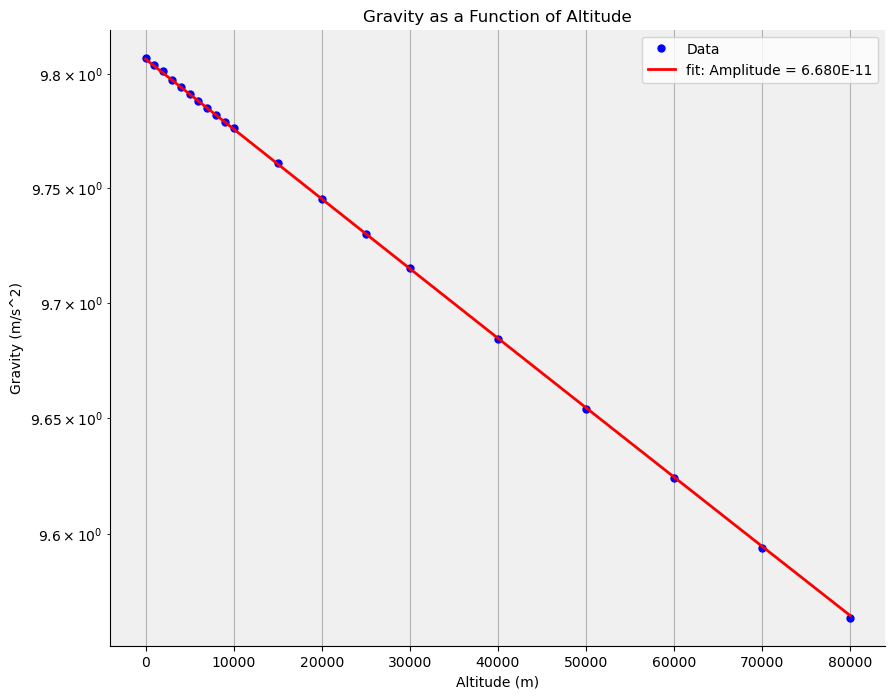

In [116]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Set the grid lines
ax.grid(True)

# Set the background color
ax.set_facecolor('#F0F0F0')

# Set the border properties
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set the line and marker properties
line_color = 'b'
line_width = 0
marker_color = 'b'
marker_style = 'o'
marker_size = 5

# Create the plot
plt.plot(altitude, gravity, color=line_color, linewidth=line_width,
         marker=marker_style, markersize=marker_size, markerfacecolor=marker_color, label='Data')
if fit_type == 1:
    plt.plot(altitude,yfit,color='r', linewidth=2, label = 'fit: Amplitude = %.3E' % tuple(popt))
else:
    plt.plot(altitude,yfit,color='r', linewidth=2, label = 'fit: Amplitude = %.3E, \nLinear = %.3E' % tuple(popt))

# Set the plot title and axis labels
plt.title("Gravity as a Function of Altitude")
plt.xlabel("Altitude (m)")
plt.ylabel("Gravity (m/s^2)")
plt.yscale("log")
plt.legend()

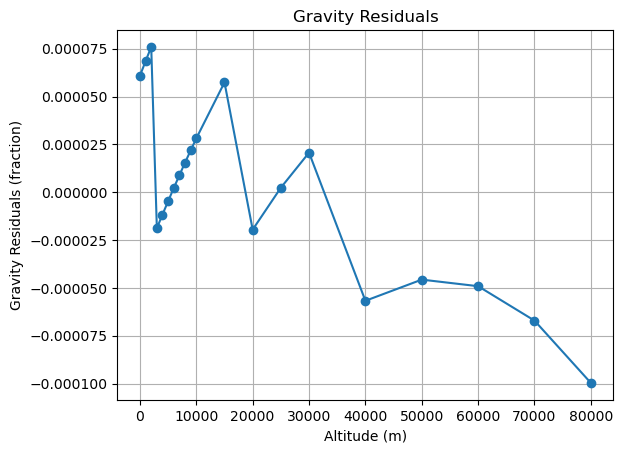

In [117]:
plt.title("Gravity Residuals")
plt.xlabel('Altitude (m)')
plt.ylabel('Gravity Residuals (fraction)')
plt.grid(True)

plt.plot(altitude, (gravity - fitfunction(altitude, *popt))/gravity, 'o-')

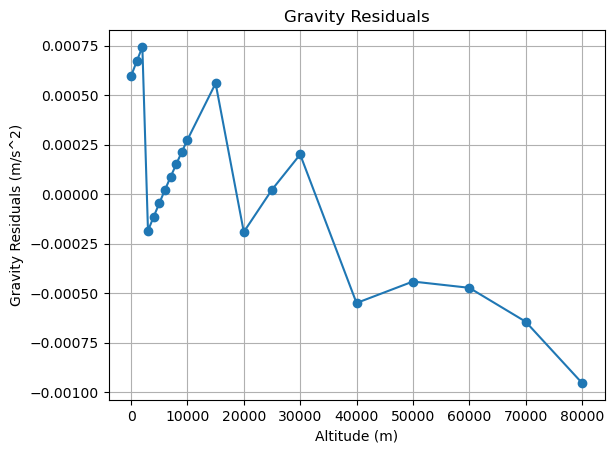

In [118]:
plt.title("Gravity Residuals")
plt.xlabel('Altitude (m)')
plt.ylabel('Gravity Residuals (m/s^2)')
plt.grid(True)

plt.plot(altitude, (gravity - fitfunction(altitude, *popt)), 'o-')
residuals = (gravity - fitfunction(altitude, *popt))
popt_exponential = popt

In [119]:
init_vals = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

def residualfunction(x,a,b,c,d,e,f,g,h):
    return a+b*np.power(np.array(x),1)+c*np.power(np.array(x),2)+d*np.power(np.array(x),3)+e*np.power(np.array(x),4)+f*np.power(np.array(x),5)+g*np.power(np.array(x),6)+h*np.power(np.array(x),7)


In [120]:
if use_errors == False:
    popt, pcov = curve_fit(residualfunction, altitude, residuals, p0=init_vals)
else:
    popt, pcov = curve_fit(residualfunction, altitude, residuals, sigma=gravity_uncertainty, absolute_sigma=True, p0=init_vals)

In [121]:
print (popt, pcov)

[ 7.41459014e-04 -2.96911194e-07  4.42131461e-11 -2.75401671e-15
  8.44644581e-20 -1.36561486e-24  1.11974234e-29 -3.67644702e-35] [[ 4.66198515e-08 -2.24010608e-11  3.34955272e-15 -2.19087715e-19
   7.25354136e-24 -1.27074490e-28  1.12276223e-33 -3.93637523e-39]
 [-2.24010608e-11  1.69142523e-14 -3.02115220e-18  2.15592567e-22
  -7.50735377e-27  1.35876085e-31 -1.22795542e-36  4.37665964e-42]
 [ 3.34955272e-15 -3.02115220e-18  5.87398586e-22 -4.38686091e-26
   1.57161616e-30 -2.90034749e-35  2.65840393e-40 -9.57663155e-46]
 [-2.19087715e-19  2.15592567e-22 -4.38686091e-26  3.37223668e-30
  -1.23292615e-34  2.30987358e-39 -2.14181642e-44  7.78613162e-50]
 [ 7.25354136e-24 -7.50735377e-27  1.57161616e-30 -1.23292615e-34
   4.57785308e-39 -8.68029059e-44  8.12579151e-49 -2.97667891e-54]
 [-1.27074490e-28  1.35876085e-31 -2.90034749e-35  2.30987358e-39
  -8.68029059e-44  1.66186731e-48 -1.56789196e-53  5.78026405e-59]
 [ 1.12276223e-33 -1.22795542e-36  2.65840393e-40 -2.14181642e-44
   8.

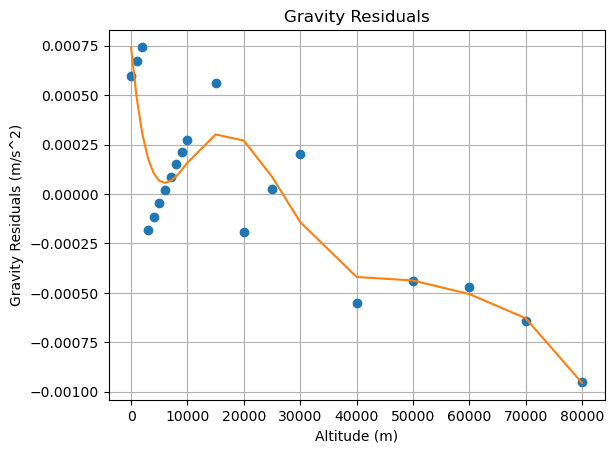

In [122]:
plt.title("Gravity Residuals")
plt.xlabel('Altitude (m)')
plt.ylabel('Gravity Residuals (m/s^2)')
plt.grid(True)


plt.plot(altitude, residuals, 'o')
plt.plot(altitude, residualfunction(altitude, *popt), '-')

In [123]:
popt_combined = [popt_exponential[0], popt[0], popt[1], popt[2], popt[3], popt[4], popt[5], popt[6], popt[7]]

In [124]:
def fitfunction_combined(x,a0,a1,a,b,c,d,e,f,g):
    return a0*np.exp(a1*np.array(x))+a+b*np.power(np.array(x),1)+c*np.power(np.array(x),2)+d*np.power(np.array(x),3)+e*np.power(np.array(x),4)+f*np.power(np.array(x),5)+g*np.power(np.array(x),6)

In [125]:
init_vals = popt_combined
if use_errors == False:
    popt, pcov = curve_fit(fitfunction_combined, altitude, gravity, p0=init_vals)
else:
    popt, pcov = curve_fit(fitfunction_combined, altitude, gravity, sigma=gravity_uncertainty, absolute_sigma=True, p0=init_vals)

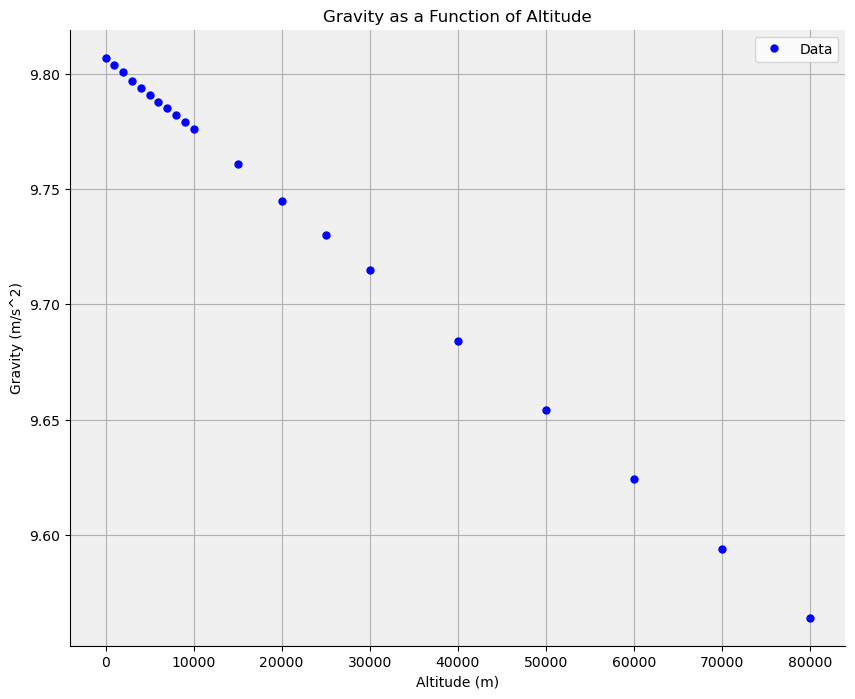

In [126]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Set the grid lines
ax.grid(True)

# Set the background color
ax.set_facecolor('#F0F0F0')

# Set the border properties
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set the line and marker properties
line_color = 'b'
line_width = 0
marker_color = 'b'
marker_style = 'o'
marker_size = 5

# Create the plot
plt.plot(altitude, gravity, color=line_color, linewidth=line_width,
         marker=marker_style, markersize=marker_size, markerfacecolor=marker_color, label='Data')

#plt.plot(altitude,np.abs(yfit),color='r', linewidth=2, label = "Fit")


# Set the plot title and axis labels
plt.title("Gravity as a Function of Altitude")
plt.xlabel("Altitude (m)")
plt.ylabel("Gravity (m/s^2)")
#plt.yscale("log")
plt.legend()


In [127]:
from scipy.optimize import curve_fit

if fit_type == 1:
    init_vals = [9.85]
else:
    init_vals = [9.85,-0.0001]

if use_errors == False:
    popt, pcov = curve_fit(fitfunction, altitude, gravity, p0=init_vals)
else:
    popt, pcov = curve_fit(fitfunction, altitude, gravity, sigma=gravity_uncertainty, absolute_sigma=True, p0=init_vals)

print (popt)
print (pcov)

[6.67994045e-11]
[[4.94780326e-31]]


In [128]:
yfit = []
chi2=0
for i in range (0,npoints):
    yfit.append(fitfunction(altitude[i],*popt))
    chi2 += (gravity[i]-yfit[i])*(gravity[i]-yfit[i])

print ("Chi^2 / dof = %.3E / %d" % (chi2,npoints-len(init_vals)))

Chi^2 / dof = 3.997E-06 / 19


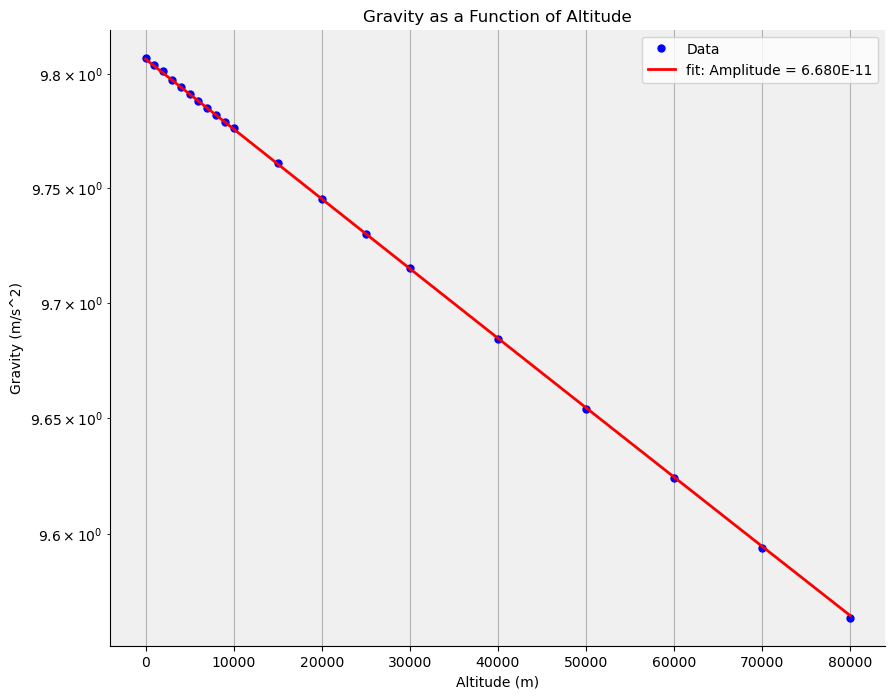

In [129]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Set the grid lines
ax.grid(True)

# Set the background color
ax.set_facecolor('#F0F0F0')

# Set the border properties
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set the line and marker properties
line_color = 'b'
line_width = 0
marker_color = 'b'
marker_style = 'o'
marker_size = 5

# Create the plot
plt.plot(altitude, gravity, color=line_color, linewidth=line_width,
         marker=marker_style, markersize=marker_size, markerfacecolor=marker_color, label='Data')
if fit_type == 1:
    plt.plot(altitude,yfit,color='r', linewidth=2, label = 'fit: Amplitude = %.3E' % tuple(popt))
else:
    plt.plot(altitude,yfit,color='r', linewidth=2, label = 'fit: Amplitude = %.3E, \nLinear = %.3E' % tuple(popt))

# Set the plot title and axis labels
plt.title("Gravity as a Function of Altitude")
plt.xlabel("Altitude (m)")
plt.ylabel("Gravity (m/s^2)")
plt.yscale("log")
plt.legend()

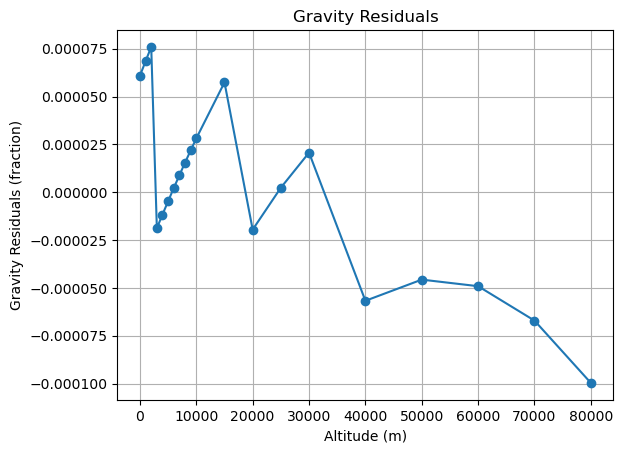

In [130]:
plt.title("Gravity Residuals")
plt.xlabel('Altitude (m)')
plt.ylabel('Gravity Residuals (fraction)')
plt.grid(True)

plt.plot(altitude, (gravity - fitfunction(altitude, *popt))/gravity, 'o-')

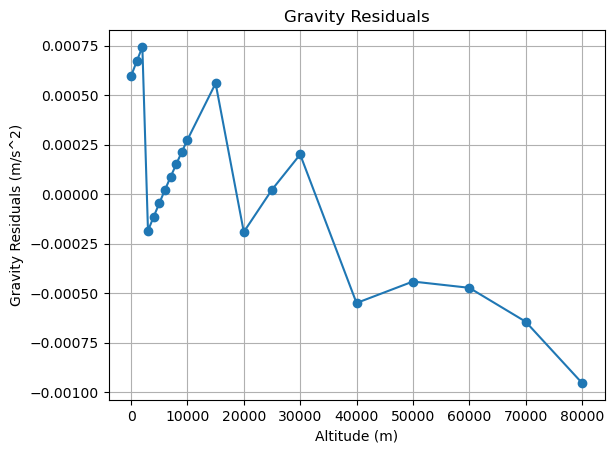

In [131]:
plt.title("Gravity Residuals")
plt.xlabel('Altitude (m)')
plt.ylabel('Gravity Residuals (m/s^2)')
plt.grid(True)

plt.plot(altitude, (gravity - fitfunction(altitude, *popt)), 'o-')
residuals = (gravity - fitfunction(altitude, *popt))
popt_exponential = popt

In [132]:
init_vals = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

def residualfunction(x,a,b,c,d,e,f,g):
    return a+b*np.power(np.array(x),1)+c*np.power(np.array(x),2)+d*np.power(np.array(x),3)+e*np.power(np.array(x),4)+f*np.power(np.array(x),5)+g*np.power(np.array(x),6)


In [133]:
if use_errors == False:
    popt, pcov = curve_fit(residualfunction, altitude, residuals, p0=init_vals)
else:
    popt, pcov = curve_fit(residualfunction, altitude, residuals, sigma=gravity_uncertainty, absolute_sigma=True, p0=init_vals)

In [134]:
print (popt, pcov)

[ 6.70999177e-04 -2.18570036e-07  2.70711580e-11 -1.36030984e-15
  3.11821485e-20 -3.30949079e-25  1.32112309e-30] [[ 3.80475975e-08 -1.36442636e-11  1.47429508e-15 -6.80235237e-20
   1.50780531e-24 -1.58634240e-29  6.35846424e-35]
 [-1.36442636e-11  7.38824908e-15 -9.54640024e-19  4.83682990e-23
  -1.13361824e-27  1.23683481e-32 -5.08446435e-38]
 [ 1.47429508e-15 -9.54640024e-19  1.37160125e-22 -7.36499447e-27
   1.78840049e-31 -1.99771781e-36  8.35009103e-42]
 [-6.80235237e-20  4.83682990e-23 -7.36499447e-27  4.09483052e-31
  -1.01731382e-35  1.15481013e-40 -4.88461532e-46]
 [ 1.50780531e-24 -1.13361824e-27  1.78840049e-31 -1.01731382e-35
   2.56806936e-40 -2.94972856e-45  1.25900938e-50]
 [-1.58634240e-29  1.23683481e-32 -1.99771781e-36  1.15481013e-40
  -2.94972856e-45  3.41884774e-50 -1.46967524e-55]
 [ 6.35846424e-35 -5.08446435e-38  8.35009103e-42 -4.88461532e-46
   1.25900938e-50 -1.46967524e-55  6.35415245e-61]]


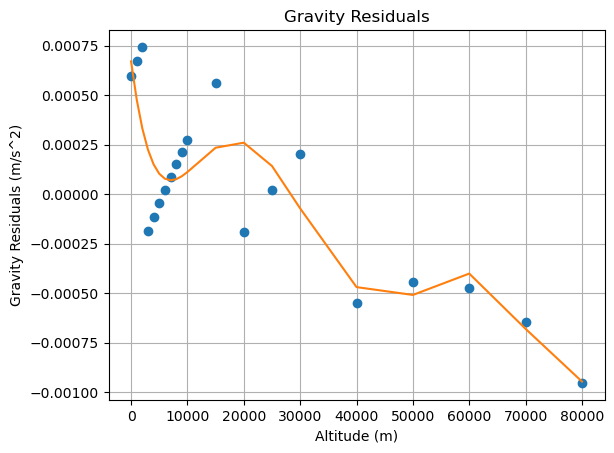

In [135]:
plt.title("Gravity Residuals")
plt.xlabel('Altitude (m)')
plt.ylabel('Gravity Residuals (m/s^2)')
plt.grid(True)


plt.plot(altitude, residuals, 'o')
plt.plot(altitude, residualfunction(altitude, *popt), '-')

In [136]:
popt_combined = [popt_exponential[0], popt[0], popt[1], popt[2], popt[3], popt[4], popt[5], popt[6]]

In [137]:
def fitfunction_combined(x,a0,a1,a,b,c,d,e,f):
    return a0*np.exp(a1*np.array(x))+a+b*np.power(np.array(x),1)+c*np.power(np.array(x),2)+d*np.power(np.array(x),3)+e*np.power(np.array(x),4)+f*np.power(np.array(x),5)

In [138]:
init_vals = popt_combined
if use_errors == False:
    popt, pcov = curve_fit(fitfunction_combined, altitude, gravity, p0=init_vals)
else:
    popt, pcov = curve_fit(fitfunction_combined, altitude, gravity, sigma=gravity_uncertainty, absolute_sigma=True, p0=init_vals)

In [139]:
print (popt, pcov)

[ 1.52192830e-26  6.70988180e-04  9.80700412e+00 -3.23106089e-06
  1.64997597e-11 -6.30238765e-16  1.02583993e-20 -5.82107287e-26] [[ 1.28133312e-44 -1.05168026e-23  6.96229760e-27 -5.74479427e-30
   9.33888797e-34 -5.06248906e-38  1.07465780e-42 -7.74893164e-48]
 [-1.05168026e-23  8.63187998e-03 -5.71389022e-06  4.71477017e-09
  -7.66453927e-13  4.15488549e-17 -8.82000247e-22  6.35979956e-27]
 [ 6.96229760e-27 -5.71389022e-06  4.38102601e-08 -1.51084664e-11
   1.52911174e-15 -6.27487893e-20  1.10980175e-24 -7.03500980e-30]
 [-5.74479427e-30  4.71477017e-09 -1.51084664e-11  7.81604820e-15
  -9.43369354e-19  4.24459688e-23 -7.92790315e-28  5.20560797e-33]
 [ 9.33888797e-34 -7.66453927e-13  1.52911174e-15 -9.43369354e-19
   1.26700651e-22 -6.04299464e-27  1.16911768e-31 -7.85577248e-37]
 [-5.06248906e-38  4.15488549e-17 -6.27487893e-20  4.24459688e-23
  -6.04299464e-27  2.98344673e-31 -5.90195801e-36  4.02720910e-41]
 [ 1.07465780e-42 -8.82000247e-22  1.10980175e-24 -7.92790315e-28
   1.

Chi^2 / dof = 1.019E-06 / 12


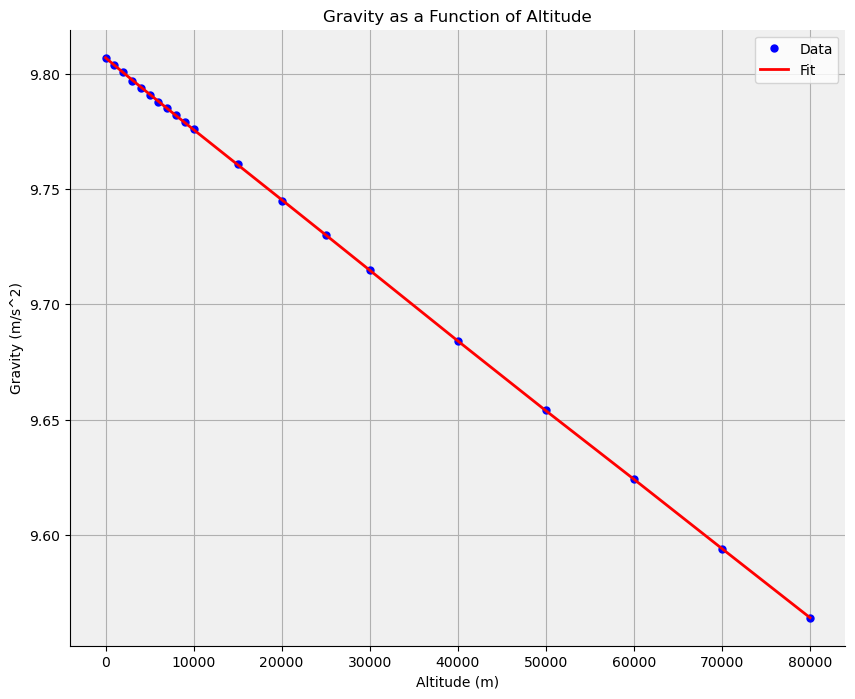

In [140]:
yfit = []
chi2=0
for i in range (0,npoints):
    yfit.append(fitfunction_combined(altitude[i],*popt))
    chi2 += (gravity[i]-yfit[i])*(gravity[i]-yfit[i])
    
print ("Chi^2 / dof = %.3E / %d" % (chi2,npoints-len(init_vals)))

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Set the grid lines
ax.grid(True)

# Set the background color
ax.set_facecolor('#F0F0F0')

# Set the border properties
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set the line and marker properties
line_color = 'b'
line_width = 0
marker_color = 'b'
marker_style = 'o'
marker_size = 5

# Create the plot
plt.plot(altitude, gravity, color=line_color, linewidth=line_width,
         marker=marker_style, markersize=marker_size, markerfacecolor=marker_color, label='Data')

plt.plot(altitude,np.abs(yfit),color='r', linewidth=2, label = "Fit")

# Set the plot title and axis labels
plt.title("Gravity as a Function of Altitude")
plt.xlabel("Altitude (m)")
plt.ylabel("Gravity (m/s^2)")
#plt.yscale("log")
plt.legend()